# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# XGBoost (if not installed: pip install xgboost)
from xgboost import XGBRegressor
# Step 2: Load Dataset
data = pd.read_csv('housing.csv')
# Step 3: Drop Null Values
data = data.dropna()
print(f"Data shape after dropping nulls: {data.shape}")
# Step 4: Separate Features and Target
# Replace 'target_column' with your target column name
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
# Step 5: Encode Categorical Variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le
# Step 6: Split into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Step 8: Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}
# Step 9: Train, Predict, and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    print(f"\n{name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
# Step 10: Compare Models
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print("\nModel Comparison:\n", results_df)

Data shape after dropping nulls: (20433, 10)
Epoch 1/100


C:\Users\MUHAMMAD BILAL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


409/409 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 48135778304.0000 - mean_squared_error: 48135778304.0000 - val_loss: 23861172224.0000 - val_mean_squared_error: 23861172224.0000
Epoch 2/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12310546432.0000 - mean_squared_error: 12310546432.0000 - val_loss: 9695939584.0000 - val_mean_squared_error: 9695939584.0000
Epoch 3/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8035123200.0000 - mean_squared_error: 8035123200.0000 - val_loss: 7555400704.0000 - val_mean_squared_error: 7555400704.0000
Epoch 4/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6608248320.0000 - mean_squared_error: 6608248320.0000 - val_loss: 6372891136.0000 - val_mean_squared_error: 6372891136.0000
Epoch 5/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5747629568.0000 - mean_squared_error: 5747629568.0000 - val_loss: 5621725184.0000 - val_mean_squared_error: 5621725184.0000
Epoch 6/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5216109568.0000 - me

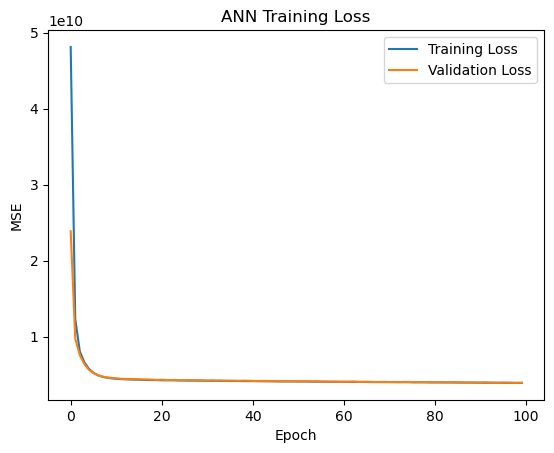

In [10]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 2: Load Dataset
data = pd.read_csv('housing.csv')

# Step 3: Drop Null Values
data = data.dropna()
print(f"Data shape after dropping nulls: {data.shape}")

# Step 4: Separate Features and Target
# Replace 'target_column' with your target column name
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# Step 5: Encode Categorical Variables
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build ANN Model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer + first hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Step 9: Compile Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Step 10: Train Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Step 11: Predict on Test Set
y_pred = model.predict(X_test).flatten()

# Step 12: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nANN Regression Performance:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 13 (Optional): Plot Training Loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()